# Trait Weight Based Optimization

In [2]:
#imports required
import numpy as np
import numpy.random as rnd
import scipy
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.optimize import minimize
from numpy import linalg as LA
import cvxpy as cp
import exp_setup
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from trait_weight_optimization.exp_setup import *

%load_ext autoreload
%autoreload 2

In [3]:
#installations

### Setup

We will modelling the robot team allocation to solve few independent challenges.

The species will be the 20 types of robots(divided into 4 groups).For each demonstration, each type of robot from the group will be randomly assigned to the expert.

There are 9 traits for each robot specie which are generic and mostly applicable to all of them. 

There are three task which are required to be completed with the allocation. 

In [34]:
# experiment settings
num_species = 4 #drone,rover,mini-rover,mini-drone
num_tasks = 3  #pick,search for target,move object
num_traits = 9 #speed,footprint,payload,reach,weight,sensing frequency,sensing range,color,battery capacity
traits = ["speed","footprint","payload","reach","weight","sensing frequency","sensing range","color","battery"]
num_demo = 1000

In [35]:
Q = []
for i in range(num_demo):
    Q.append(get_random_q())
Q = np.array(Q)
Q.shape

(1000, 4, 9)

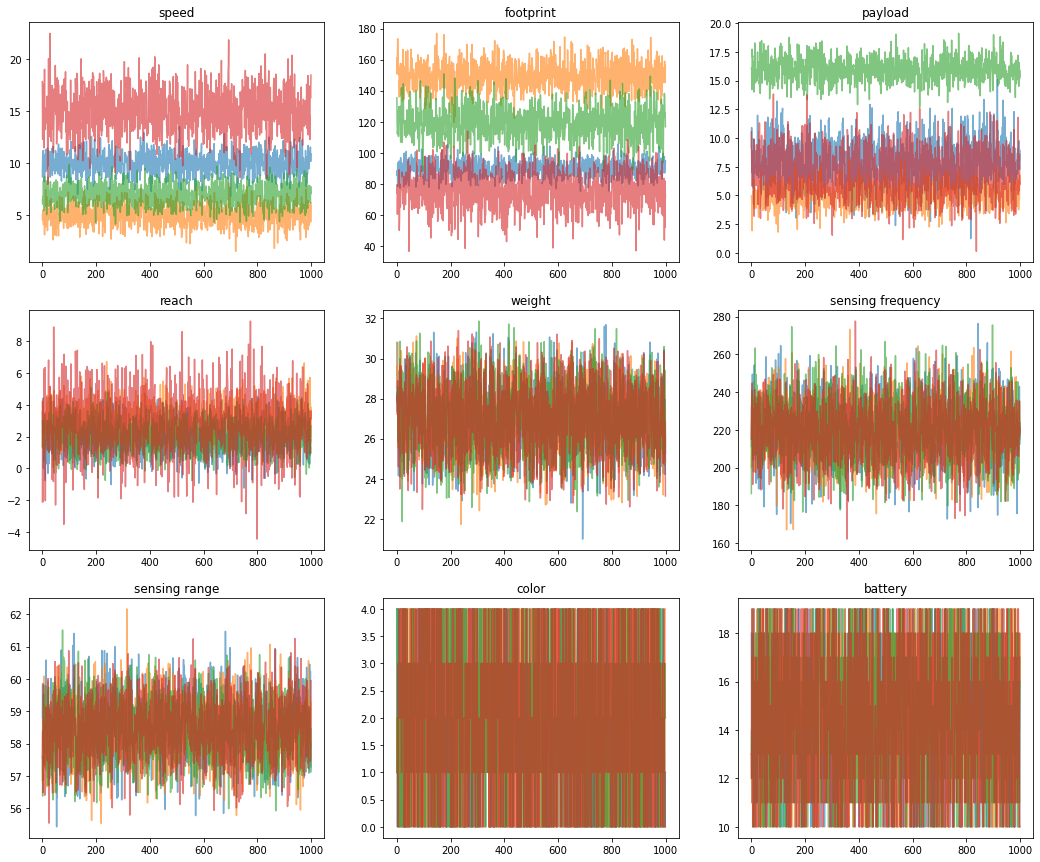

In [62]:
#Visualizations
plt.rcParams["figure.figsize"] = (18,15)

#Species across all the 9 traits
figure, axs = plt.subplots(3,3)
for i, ax in enumerate(axs.flat):
    ax.plot(range(num_demo), Q[:,:,i],alpha=0.6)
    ax.set_title(traits[i])

In [73]:
#Visualization Trait space

#Traits with respect to other traits can be mapped to visualize the traits spaces

#Visualizations
plt.rcParams["figure.figsize"] = (12,12)

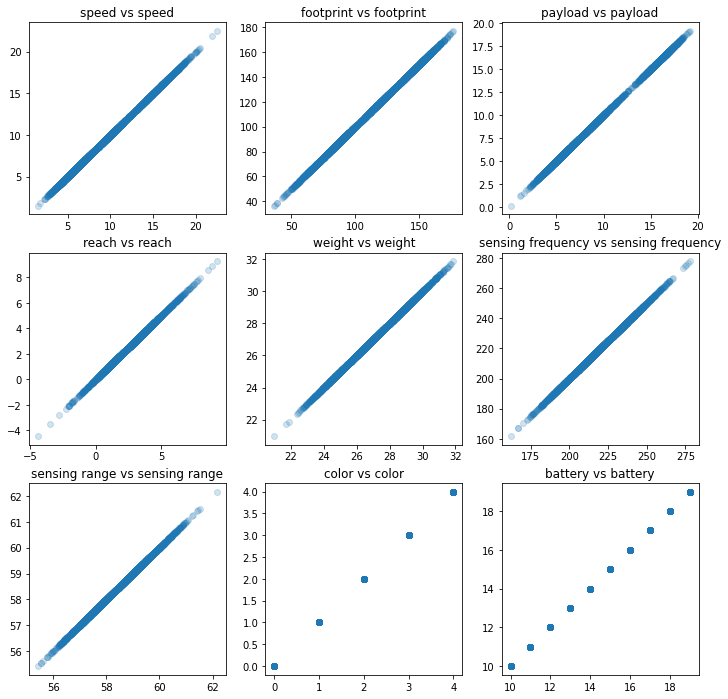

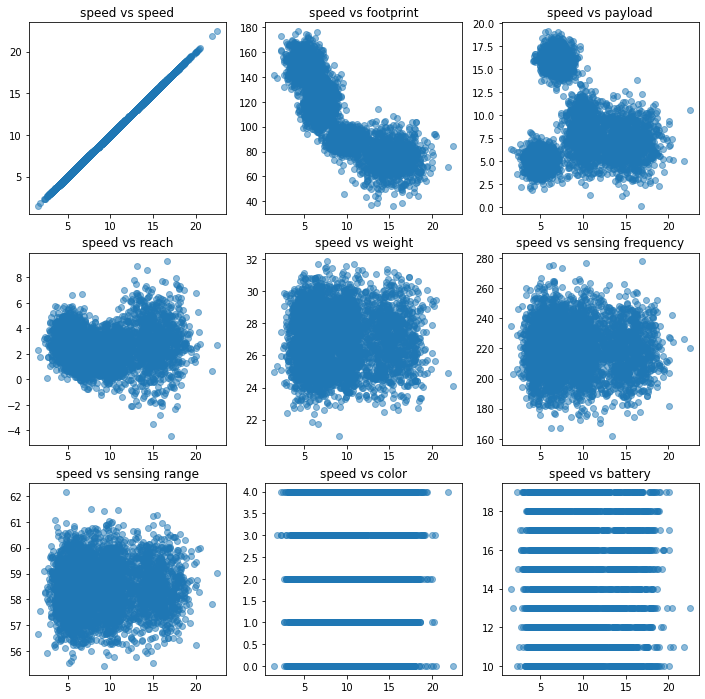

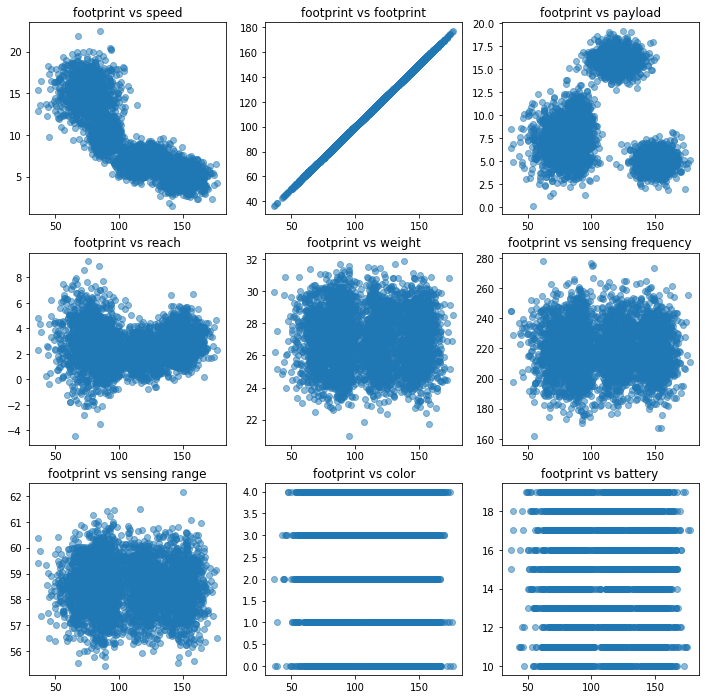

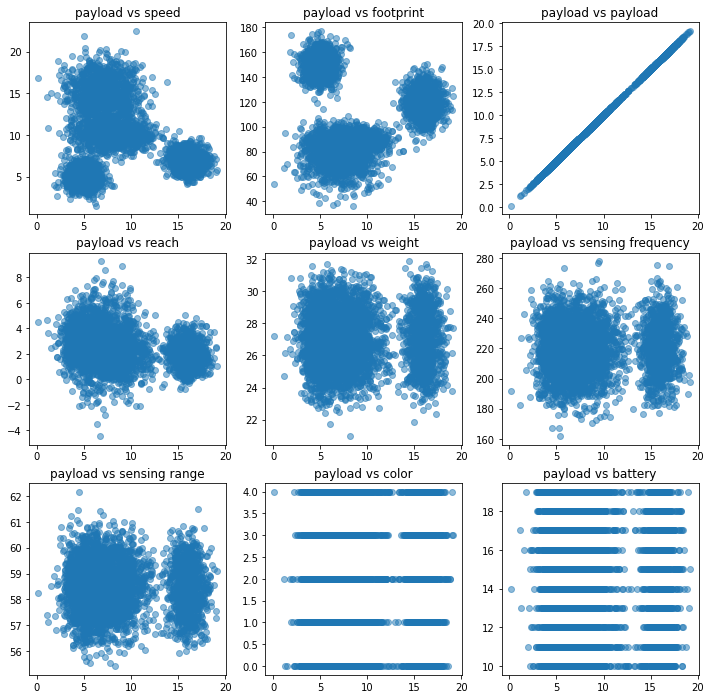

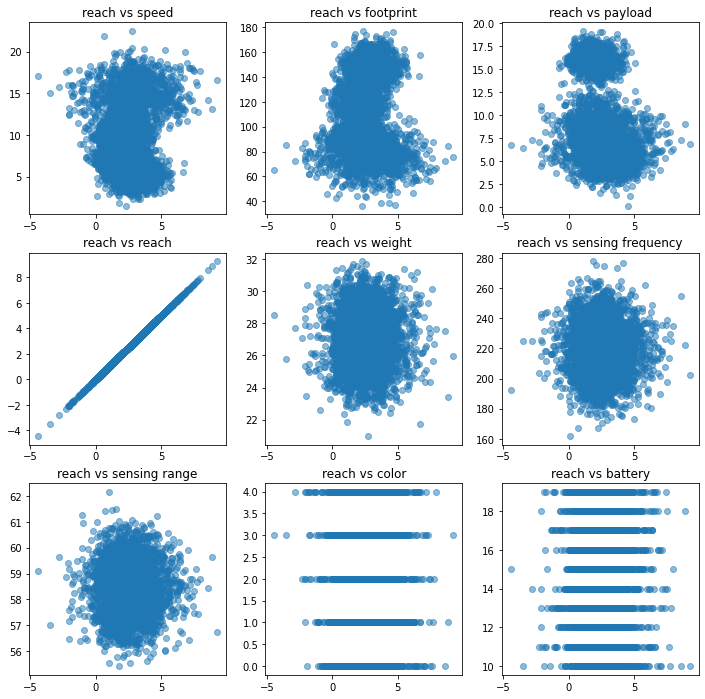

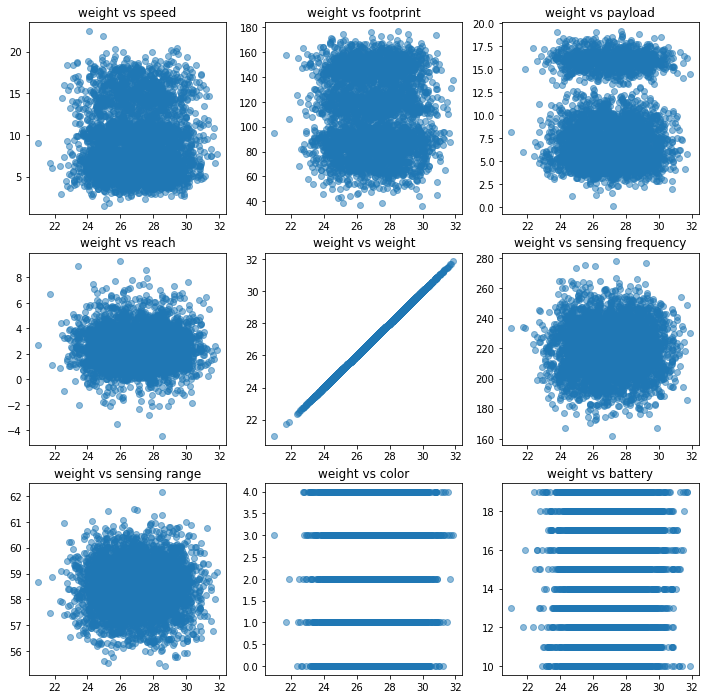

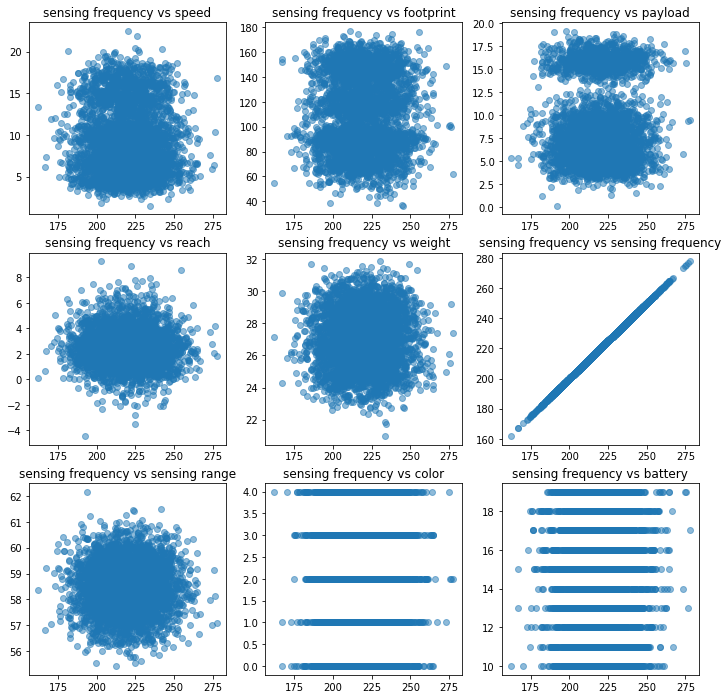

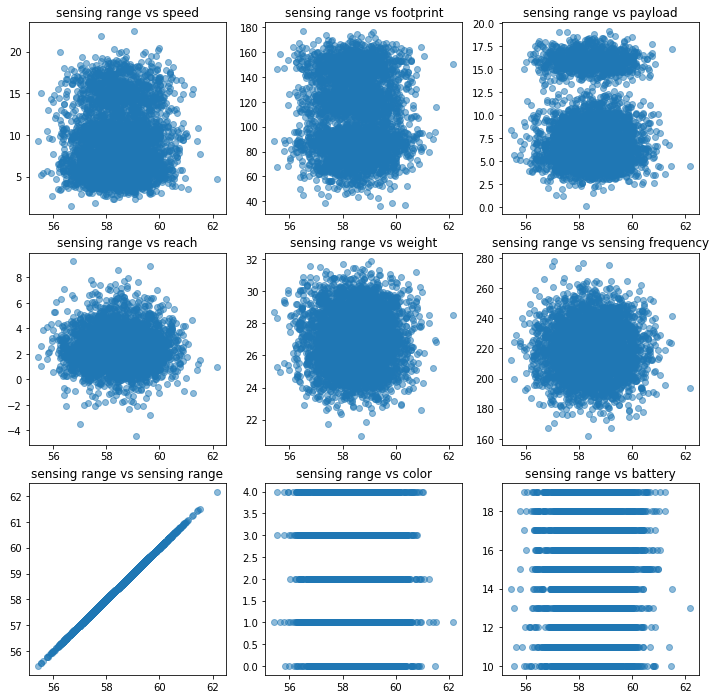

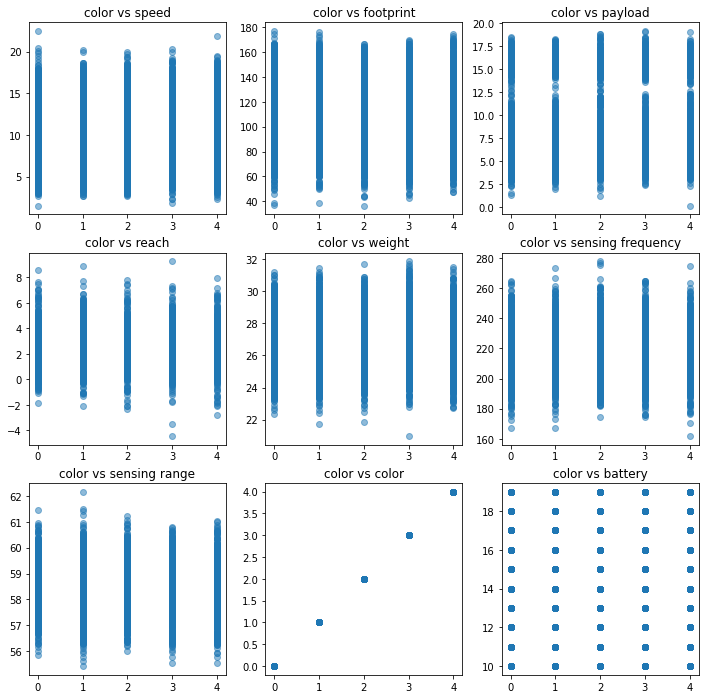

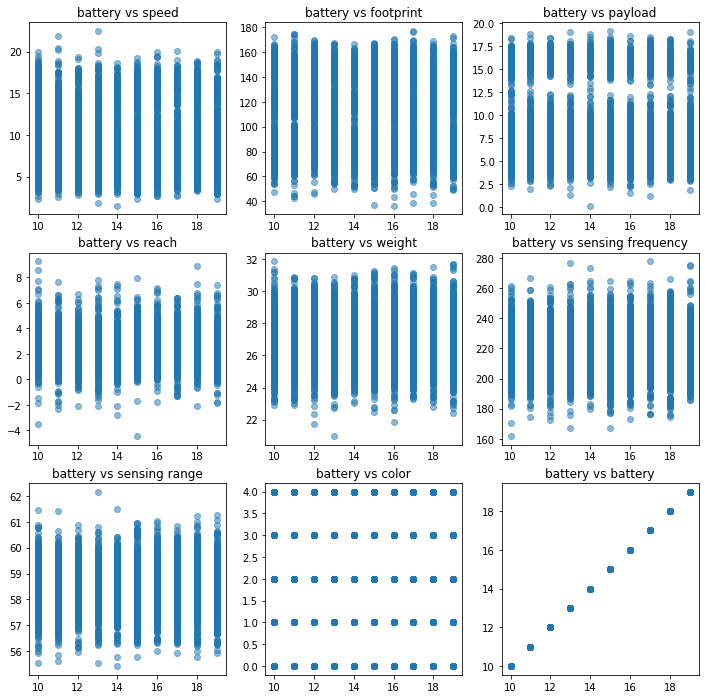

In [74]:
#self maps
figure, axs = plt.subplots(3,3)
for i, ax in enumerate(axs.flat):
    ax.scatter(Q[:,:,i], Q[:,:,i],alpha=0.2)
    ax.set_title(traits[i] + " vs "+ traits[i] )

#one trait to another
for t in range(num_traits):
    figure, axs = plt.subplots(3,3)
    for i, ax in enumerate(axs.flat):
        ax.scatter(Q[:,:,t], Q[:,:,i],alpha=0.5)
        ax.set_title(traits[t] + " vs "+ traits[i] )

In [54]:
#speed,footprint,payload,reach,weight,sensing frequency,sensing range,color,battery capacity
y1 = [1,0,1,1,0,1,1,0,0]#pick
y2 = [0,1,0,0,0,1,1,0,1]#search for target
y3 = [1,1,1,1,1,1,0,0,1]#move object
y_star = np.array([y1,y2,y3])
y_star

array([[1, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 1]])

In [55]:
def minimize_func(input_x):
    x = input_x.reshape((3,4))
    diff = (y_star - x@Q)
    return LA.norm(diff,2)

In [10]:
x = np.random.randint(0,2,size = (3,4))
in_x = x.flatten()
x

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 1, 1]])

In [11]:
minimize_func(in_x)

NameError: name 'Q' is not defined

In [ ]:
res = minimize(minimize_func, in_x, method='Powell', tol=1e-6)
# print(res)
X_app = np.array(res.x).reshape((3,4))
# X_app[X_app<0] = 0
X_app

In [ ]:
print(X_app.dot(Q))
Y = X_app.dot(Q)
print(LA.norm(y_star-Y))

Y2 = abs(X_app).dot(Q)
LA.norm(y_star-Y2)



In [ ]:
X = cp.Variable((num_tasks, num_species), integer=True)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

array([2., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.])
